In [30]:
# Interactive plots
%matplotlib notebook

# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mypackage
import glob

from matplotlib.lines import Line2D

np.set_printoptions(precision=4)
pd.options.display.max_rows = 4

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### The labels for the TOMRA dataset are used as the labels for the fake dataset and then the image is filled with spectral measurements from the Matis lab

In [5]:
wavelengths = np.array([928, 932, 935, 939, 942, 946, 950, 953, 957, 960, 964, 968, 971, 975, 978, 982, 986, 989, 993, 997, 1000, 1004, 1007, 1011, 1015, 1018, 1022, 1025, 1029, 1033, 1036, 1040, 1043, 1047, 1051, 1054, 1058, 1061, 1065, 1069, 1072, 1076, 1079, 1083, 1087, 1090, 1094, 1097, 1101, 1105, 1108, 1112, 1115, 1119, 1123, 1126, 1130, 1134, 1137, 1141, 1144, 1148, 1152, 1155, 1159, 1162, 1166, 1170, 1173, 1177, 1180, 1184, 1188, 1191, 1195, 1198, 1202, 1206, 1209, 1213, 1216, 1220, 1224, 1227, 1231, 1234, 1238, 1242, 1245, 1249, 1252, 1256, 1260, 1263, 1267, 1271, 1274, 1278, 1281, 1285, 1289, 1292, 1296, 1299, 1303, 1307, 1310, 1314, 1317, 1321, 1325, 1328, 1332, 1335, 1339, 1343, 1346, 1350, 1353, 1357, 1361, 1364, 1368, 1371, 1375, 1379, 1382, 1386, 1390, 1393, 1397, 1400, 1404, 1408, 1411, 1415, 1418, 1422, 1426, 1429, 1433, 1436, 1440, 1444, 1447, 1451, 1454, 1458, 1462, 1465, 1469, 1472, 1476, 1480, 1483, 1487, 1490, 1494, 1498, 1501, 1505, 1508, 1512, 1516, 1519, 1523, 1527, 1530, 1534, 1537, 1541, 1545, 1548, 1552, 1555, 1559, 1563, 1566, 1570, 1573, 1577, 1581, 1584, 1588, 1591, 1595, 1599, 1602, 1606, 1609, 1613, 1617, 1620, 1624, 1627, 1631, 1635, 1638, 1642, 1645, 1649, 1653, 1656, 1660, 1664, 1667, 1671, 1674])
fake_data = mypackage.FakeDataset(wavelengths=wavelengths)
X, Y = fake_data.get_images(1)

(8352, 208)
1
(1491, 208)
2
Desired shape (1491, 208)
selected_spectrum.shape (1491, 2203)
len(self.wavelengths) 208
(157, 208)
3
Desired shape (157, 208)
selected_spectrum.shape (157, 2203)
len(self.wavelengths) 208


In [74]:
X.shape, Y.shape

((1, 100, 100, 208), (1, 100, 100, 1))

<IPython.core.display.Javascript object>


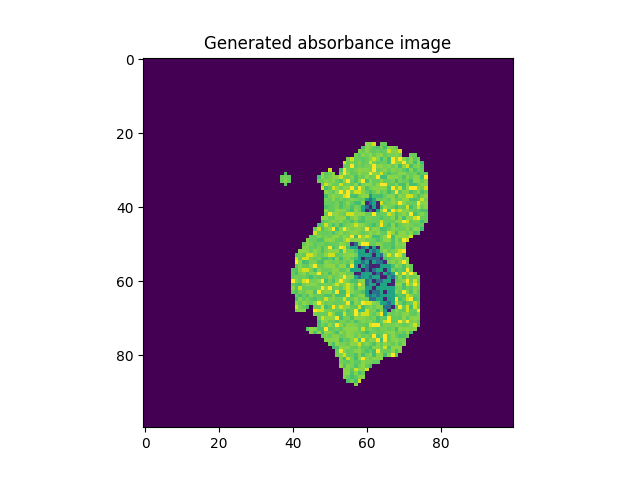

Average value for each group at this channel Background:0.00, Fillet:1.23, Contaminant:0.63


In [54]:
def get_mean_of_each_type(data, label):
    label = np.squeeze(label)
    mean_values = []
    for group in np.unique(label):
        mean_values.append(np.mean(data[label == group]))
    return mean_values

def print_mean_values(mean_values):
    types = {0: "Background", 1: "Fillet", 2: "Contaminant"}
    print(f"Average value for each group at this channel {', '.join([f'{types[i]}:{val:.2f}' for i, val in enumerate(mean_values)])}")


plt.figure()
plt.title("Generated absorbance image")
plt.imshow(X[0, :, :, 4])
mean_values = get_mean_of_each_group(X[0, :, :, 4], Y[0, :, :])
print_mean_values(mean_values)

<IPython.core.display.Javascript object>


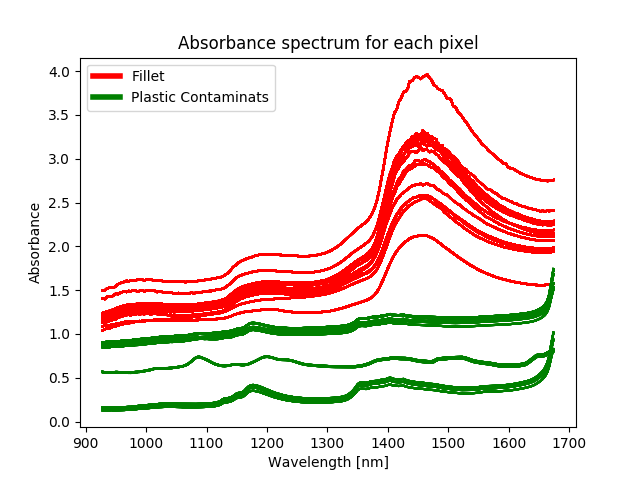

In [60]:
def plot_spectrum(data, label, type_number, color=None):
    spectra = data[0, np.squeeze(label) == type_number]
    for i in range(len(spectra)):
        plt.plot(wavelengths, spectra[i], color=color)
        
fig = plt.figure()
plt.title("Absorbance spectrum for each pixel")
plot_spectrum(X, Y, 2, "red")
plot_spectrum(X, Y, 3, "green")
plt.ylabel("Absorbance")
plt.xlabel("Wavelength [nm]")
ax = fig.axes[0]
ax.legend([Line2D([0], [0], color='Red', lw=4),
           Line2D([0], [0], color='Green', lw=4)], ['Fillet', 'Plastic Contaminats']);

### Now inspecting the same image transformed as a reflectance image

<IPython.core.display.Javascript object>


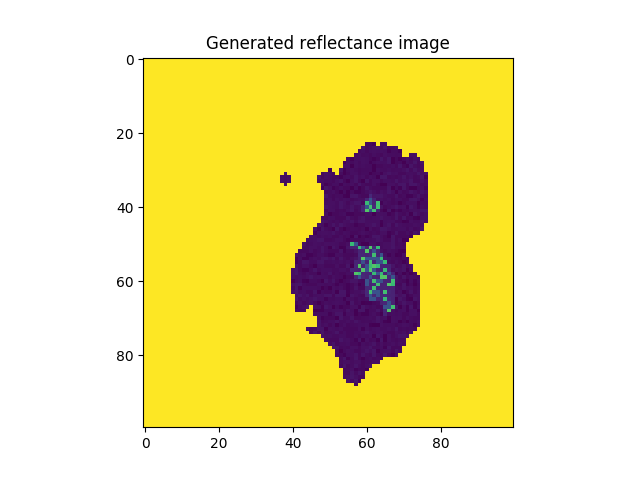

Average value for each group at this channel Background:1.00, Fillet:0.06, Contaminant:0.31


In [56]:
X_reflectance = mypackage.FakeDataset.transform_to_reflectance(X)

plt.figure()
plt.title("Generated reflectance image")
plt.imshow(X_reflectance[0, :, :, 4]);
mean_values = get_mean_of_each_group(X_reflectance[0, :, :, 4], Y[0, :, :])
print_mean_values(mean_values)

<IPython.core.display.Javascript object>


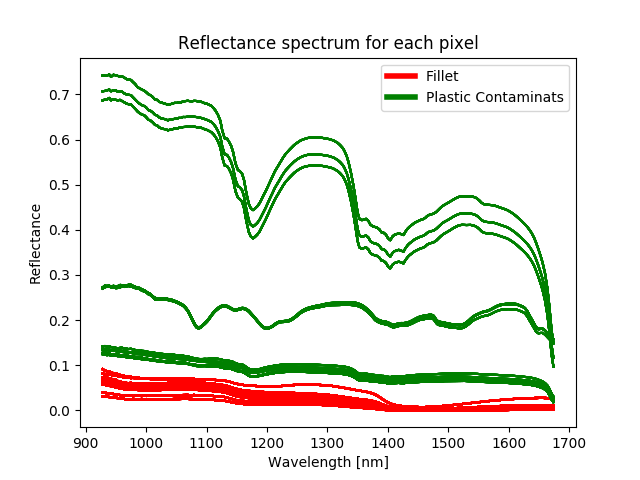

In [58]:
fig = plt.figure()
plt.title("Reflectance spectrum for each pixel")
plot_spectrum(X_reflectance, Y, 2, "red")
plot_spectrum(X_reflectance, Y, 3, "green")
plt.ylabel("Reflectance")
plt.xlabel("Wavelength [nm]")
ax = fig.axes[0]
ax.legend([Line2D([0], [0], color='Red', lw=4),
           Line2D([0], [0], color='Green', lw=4)], ['Fillet', 'Plastic Contaminats']);

### This difference in the absorbance and reflectance spectral plots indicates that the absorbance measurements might be better for classification for chicken vs rest